In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Создание данных

In [2]:
# Задаем random seed для воспроизводимости
np.random.seed(42)

# Создание трех качественных датасетов
x = np.linspace(0, 10, 100)

# Датасет 1: y = 3x + 5
y1 = 3 * x + 5

# Датасет 2: y = -2x + 4
y2 = -2 * x + 4

# Датасет 3: y = 1.5x
y3 = 1.5 * x

In [3]:
# Создание зашумленного датасета на базе первого: y = 3x + 5 + noise
noise = np.random.normal(0, 2, size=x.shape)
y_noise = 3 * x + 5 + noise

In [4]:
# Создание DataFrame для каждого датасета
df1 = pd.DataFrame({'x': x, 'y': y1})
df2 = pd.DataFrame({'x': x, 'y': y2})
df3 = pd.DataFrame({'x': x, 'y': y3})
df_noise = pd.DataFrame({'x': x, 'y': y_noise})

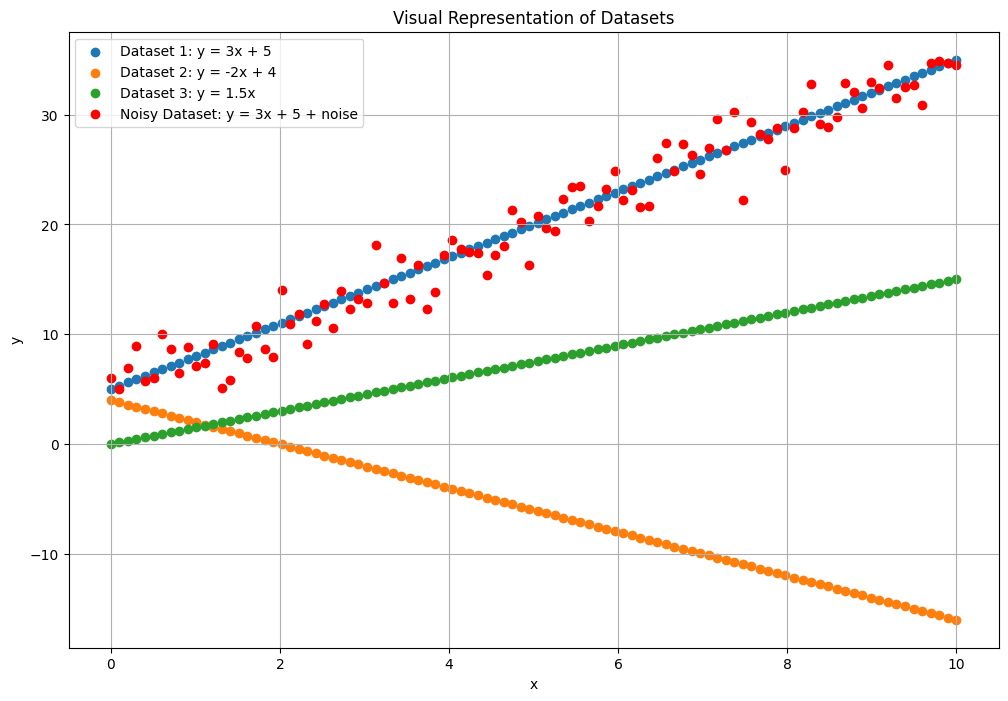

In [5]:
# Визуализация датасетов
plt.figure(figsize=(12, 8))
plt.scatter(df1['x'], df1['y'], label='Dataset 1: y = 3x + 5')
plt.scatter(df2['x'], df2['y'], label='Dataset 2: y = -2x + 4')
plt.scatter(df3['x'], df3['y'], label='Dataset 3: y = 1.5x')
plt.scatter(df_noise['x'], df_noise['y'], label='Noisy Dataset: y = 3x + 5 + noise', color='red')
plt.title('Visual Representation of Datasets')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## Обучение модели

In [6]:
# Обучение модели линейной регрессии на первом датасете (Dataset 1)
model = LinearRegression()
model.fit(df1[['x']], df1['y'])

LinearRegression()

In [7]:
# Получение предсказаний модели на обучающем датасете
y_pred = model.predict(df1[['x']])

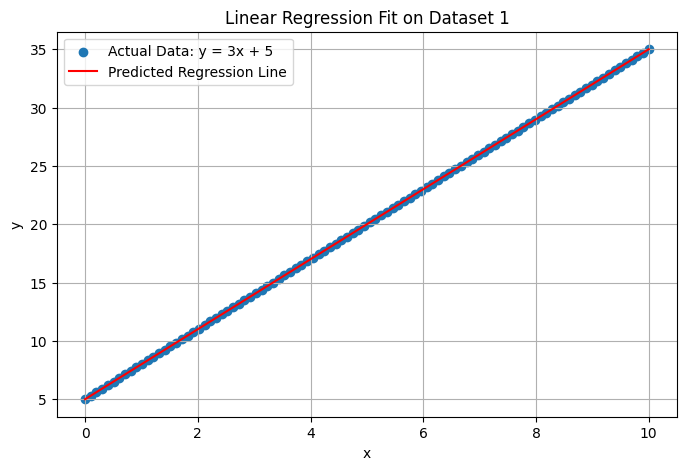

In [8]:
# Визуализация результатов обучения
plt.figure(figsize=(8, 5))
plt.scatter(df1['x'], df1['y'], label='Actual Data: y = 3x + 5')
plt.plot(df1['x'], y_pred, color='red', label='Predicted Regression Line')
plt.title('Linear Regression Fit on Dataset 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Оценка модели
mse = mean_squared_error(df1['y'], y_pred)
print(f"Model Coefficients: Slope = {model.coef_[0]:.2f}, Intercept = {model.intercept_:.2f}")
print(f"Mean Squared Error on Dataset 1: {mse:.2f}")

Model Coefficients: Slope = 3.00, Intercept = 5.00
Mean Squared Error on Dataset 1: 0.00


## Тестирование модели

In [12]:
# Формируем код функции тестирования и запись его в файл
test_script_content = """
import pytest
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Функция для тестирования модели на датасете
def test_model_on_dataset(model, X, y_true, acceptable_mse):
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true, y_pred)
    assert mse <= acceptable_mse, f"MSE {{mse}} exceeds acceptable limit of {{acceptable_mse}}"

# Создаем модель
model = LinearRegression()
model.coef_ = np.array([3.0])
model.intercept_ = 5.0

# Данные для тестирования
x = np.linspace(0, 10, 100).reshape(-1, 1)
y1 = 3 * x.flatten() + 5
y_noise = 3 * x.flatten() + 5 + np.random.normal(0, 2, size=x.shape[0])

# Тестовые случаи
@pytest.mark.parametrize("X, y_true, acceptable_mse", [
    (x, y1, 0.01),  # Датасет без шума
    (x, y_noise, 2.0)  # Зашумленный датасет
])
def test_regression_model(X, y_true, acceptable_mse):
    test_model_on_dataset(model, X, y_true, acceptable_mse)
"""

# Сохраняем тесты в файл
with open("test_regression_fixed.py", "w") as f:
    f.write(test_script_content)

print("Тесты исправлены и сохранены в файл 'test_regression_fixed.py'.")

Тесты исправлены и сохранены в файл 'test_regression_fixed.py'.
